In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [215]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('stopwords')

data = pd.read_csv('Movie_Review.csv')
data.dropna(inplace=True)

def clean_review(review):
    # Avoid using 'str' as a variable name, it overwrites the built-in str type
    cleaned_review = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return cleaned_review

data['text'] = data['text'].apply(clean_review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [216]:
data = pd.read_csv('Movie_Review.csv')

In [182]:
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [183]:
data['sentiment'].value_counts()

,count
sentiment,
neg,500
pos,500


In [184]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

#     #The function cleans the text by removing stopwords
#       Like ‘is’    ‘a’    ‘for’      ‘the’


data['text'] = data['text'].apply(clean_review) #-->> this applay the changes on the  code

In [185]:
# Packages of nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [186]:
# #wordcloud
# . text into a visual image where:
# •	Bigger words = More frequent/important in the text.
# •	Smaller words = Less frequent.

from wordcloud import WordCloud

# The positive reviews

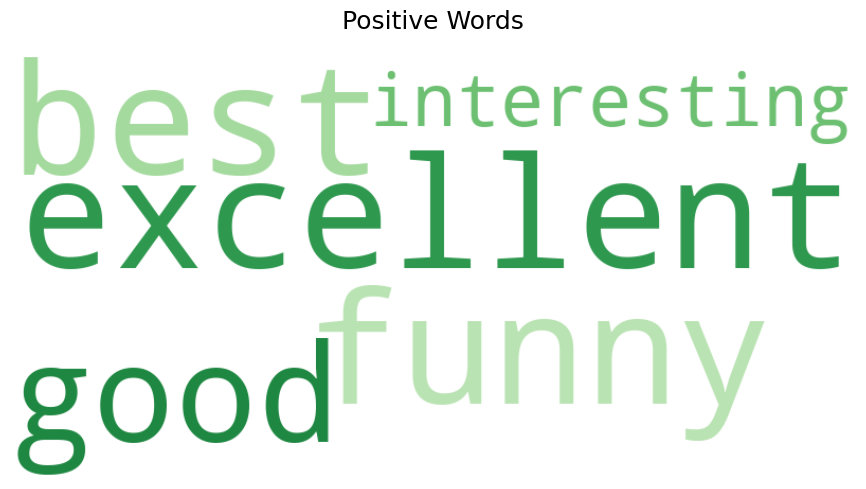

In [189]:


# Positive words dictionary (customize as needed)
positive_words = {
    'excellent', 'best', 'good', 'great', 'funny',
    'interesting', 'awesome', 'love', 'wonderful',
    'amazing', 'cool', 'fantastic', 'perfect', 'nice'
}

# Your text
text = """excellent situation use I owe job part funny two best give playmade song woman
by DVD, scenefairer bit see episode screen though day first without different use of the things every hand
always many black good may far quite right away people everything feel three big star making a
TV enough performance something saw director interesting say Hollywood picture another even"""

def generate_positive_wordcloud(text):
    # 1. Clean and filter text
    words = re.findall(r'\w+', text.lower())
    positive_text = ' '.join([word for word in words if word in positive_words])

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Greens',  # Green gradient for positive
        max_words=30,
        contour_width=1,
        contour_color='darkgreen'
    ).generate(positive_text)

    # Display
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Positive Words", fontsize=18, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

generate_positive_wordcloud(text)


positive_words = set(opinion_lexicon.positive())  # 2000+ base words


positive_words.update(['amazing', 'fantastic'])





positive_boost = {'excellent': 10, 'best': 8}  # Make these words bigger
wordcloud.generate_from_frequencies(positive_boost)


domain_words = {'oscar-worthy', 'blockbuster', 'riveting'}
positive_words.update(domain_words)


frequency_boost = {'excellent': 15, 'best': 12}  # Force prominence
wordcloud.generate_from_frequencies(frequency_boost)



---



# The negative reviews

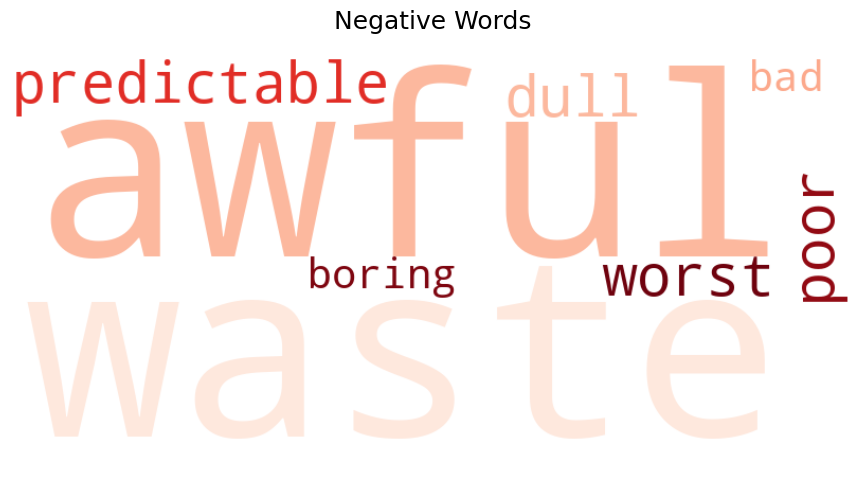

In [191]:

# Add your own domain-specific negative words
negative_words.update([
    'boring', 'awful', 'terrible', 'poor', 'worst',
    'disappointing', 'waste', 'annoying', 'bad', 'hate',
    'lame', 'dull', 'slow', 'predictable'
])

# Example text to analyze
text = """
The movie was a total waste of time. Acting was awful, script was predictable and dull.
It was one of the worst performances I've seen. Poor direction, boring scenes, and bad sound quality.
"""

def generate_negative_wordcloud(text):
    # Clean and tokenize
    words = re.findall(r'\w+', text.lower())
    negative_text = ' '.join([word for word in words if word in negative_words])

    # Word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Reds',  # Red gradient for negative
        max_words=30,
        contour_width=1,
        contour_color='darkred'
    ).generate(negative_text)

    # Display
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Negative Words", fontsize=18, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

generate_negative_wordcloud(text)

# Optional boost
frequency_boost = {
    'worst': 15,
    'awful': 10,
    'boring': 8,
    'dull': 6
}
wordcloud.generate_from_frequencies(frequency_boost)
negative_boost = {'awful': 10, 'terrible': 9, 'worst': 8}
wordcloud.generate_from_frequencies({**wordcloud.process_text(cleaned_text), **negative_boost})
# Initialize negative_words as a set before updating it
negative_words = set()

# Add custom negative words:
negative_words.update(['atrocious', 'unwatchable', 'cringeworthy'])

# Negative word boosting:
negative_boost = {'terrible': 10, 'worst': 8}  # Make these words bigger
wordcloud.generate_from_frequencies(negative_boost)

# Domain-specific negative words:
domain_negative_words = {'plot-hole', 'overacted', 'predictable'}
negative_words.update(domain_negative_words)

# Frequency boosting for prominence:
frequency_boost = {'terrible': 15, 'worst': 12}
wordcloud.generate_from_frequencies(frequency_boost)




---



# The Training and the Test

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [199]:
reviews = cv.fit_transform(data['text']).toarray()

In [200]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
model = LogisticRegression()

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [205]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [206]:
predict = model.predict(reviews_test)

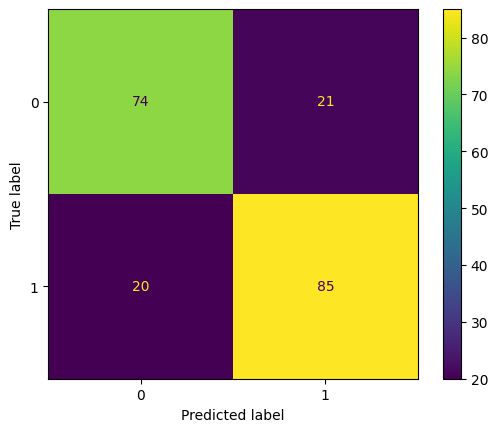

In [207]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()



---



# Pickle library to save the Model

In [208]:
import pickle as pk

In [209]:
pk.dump(model,open('model.pkl','wb'))

In [210]:
pk.dump(cv,open('scaler.pkl','wb'))



---





# ---Killing the Treminal



In [212]:
!pkill -f ngrok  # Kill all ngrok processes
!pkill -f streamlit  # Kill all Streamlit processes

In [213]:
%%writefile app.py
import pandas as pd
import pickle as pk
from sklearn.feature_extraction.text import TfidfVectorizer
import streamlit as st

# Load the model and scaler
model = pk.load(open('model.pkl', 'rb'))
scaler = pk.load(open('scaler.pkl', 'rb'))

# User input for movie review
review = st.text_input('Enter Movie Review')

if st.button('Predict'):
    # Transform the input and make prediction
    review_scale = scaler.transform([review]).toarray()
    result = model.predict(review_scale)

    # Display the result
    if result[0] == 0:
        st.error("Negative Review 😞")
    else:
        st.success("Positive Review 😊")

Overwriting app.py


In [214]:
import ipywidgets as widgets
from IPython.display import display
from pyngrok import ngrok
import threading
import time

# Widget for ngrok authtoken input
auth_token_input = widgets.Text(
    placeholder='Enter your ngrok authtoken',
    description='Auth Token:',
    layout=widgets.Layout(width='80%')
)

run_button = widgets.Button(description="Run Streamlit App")

def on_run_button_clicked(b):
    if not auth_token_input.value:
        print("Please enter your ngrok authtoken first!")
        return

    # Set ngrok authtoken
    ngrok.set_auth_token(auth_token_input.value)

    # Start Streamlit in a background thread
    def run_streamlit():
        !streamlit run app.py --server.port 8501 --server.headless true --browser.gatherUsageStats false

    thread = threading.Thread(target=run_streamlit, daemon=True)
    thread.start()

    # Give it a second to start
    time.sleep(2)

    # Create ngrok tunnel
    public_url = ngrok.connect(port='8501')
    print(f"\nYour Streamlit app is running at: {public_url.public_url}\n")

run_button.on_click(on_run_button_clicked)

# Display the widgets
display(auth_token_input, run_button)

Text(value='', description='Auth Token:', layout=Layout(width='80%'), placeholder='Enter your ngrok authtoken'…

Button(description='Run Streamlit App', style=ButtonStyle())


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.89.37:8501



PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}


In [ ]:
2wjNYnHUzRepxsEC2zAkK1zMO67_A45Mct7ji3Kg723nDR8F __> Auth